# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Abrar Argya Adana
- **Email:** abrar.argya7012@gmail.com
- **ID Dicoding:** B25B9D045

## Menentukan Pertanyaan Bisnis

-  Bagaimana rata - rata tren penyewaan sepeda pada tahun 2012?
- Pada iklim yang seperti apa rata - rata pelanggan paling banyak dan paling sedikit menyewa sepeda pada dua tahun terakhir?
- Bagaimana perbandingan pelanggan kasual dan pelanggan member di dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install numpy pandas scipy matplotlib seaborn jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

load tabel day

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/abrarargya/Proyek-Analisis-Data-Belajar-Analisis-Data-dengan-Python-Bike-Sharing/refs/heads/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


load tabel hour

In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/abrarargya/Proyek-Analisis-Data-Belajar-Analisis-Data-dengan-Python-Bike-Sharing/refs/heads/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- tabel day_df ialah jumlah peminjaman sepeda dihitung perhari
- tabel hour_df ialah jumlah peminjaman sepeda dihitung perjam
- Parameter atau kolom yang berada di kedua tabel antara lain ⬇
1. instant = indeks data
2. dteday = tanggal
3. season = musim (1:semi, 2:panas, 3:gugur, 4:dingin)
4. yr = tahun (0:2011,1:2012)
5. month = bulan
6. hr = jam
7. holiday = hari libur atau tidak (0:tidak,1:ya)
8. weekday = hari perminggu
9. workingday = jika hari tersebut bukan hari libur atau akhir pekan nilainya 1, selain itu nilainya 0
10. weathersit = situasi cuaca


*  1: Cerah, sedikit Berawan, berawan sebagian
*  2: Kabut + berawan, kabut + awan yang pecah, kabut + sedikit berawan, kabut
*  3: salju ringan, hujan ringan + badai petir + awan bertebaran, hujan ringan + awan bertebaran
*  4: hujan lebat + butiran es + badai petir + kabut, salju + kabut

11. temp = suhu normal dalam celcius. Nilai dibagi menjadi 41 (maksimal)
12. atemp: suhu perasaan yang dinormalkan dalam celcius. Nilai dibagi menjadi 50 (maks)
13. hum: kelembapan yang dinormalkan. Nilai dibagi menjadi 100 (maks).
14. windspeed: kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
15. casual: jumlah pengguna kasual
16. registered: jumlah pengguna terdaftar (member)
17. cnt: jumlah total sepeda sewaan termasuk pengguna sepeda kasual dan member




### Assessing Data

Menilai Data tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tidak ada missing value karena jumlah data tiap kolom sama. Namun tipe data dteday bisa diubah menjadi datetime.

In [6]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Memeriksa duplikasi data tabel day_df

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tidak ada duplikasi data dalam tabel day_df

memeriksa parameter statistik dalam tabel day_df

In [9]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


terdapat dugaan outlier pada kolom casual, registered, dan cnt




Hitung IQR dan deteksi outlier

In [10]:
kolom = ['casual', 'registered', 'cnt']

#Q1,Q3, dan IQR
Q1_day_df = day_df[kolom].quantile(0.25)
Q3_day_df = day_df[kolom].quantile(0.75)
IQR_day_df = Q3_day_df - Q1_day_df

# outlier dari batas atas dan bawah
minimum_day = Q1_day_df - 1.5 * IQR_day_df
maksimum_day= Q3_day_df + 1.5 * IQR_day_df

# menentukan kondisi outlier
pd.kondisi_lower_than_day = day_df[kolom] < minimum_day
pd.kondisi_greater_than_day = day_df[kolom] > maksimum_day

#print kondisi True
print("lower casual", pd.kondisi_lower_than_day[pd.kondisi_lower_than_day['casual'] == True])
print("greater casual", pd.kondisi_greater_than_day[pd.kondisi_greater_than_day['casual'] == True])
print("lower registered", pd.kondisi_lower_than_day[pd.kondisi_lower_than_day['registered'] == True])
print("greater registered", pd.kondisi_greater_than_day[pd.kondisi_greater_than_day['registered'] == True])
print("lower registered", pd.kondisi_lower_than_day[pd.kondisi_lower_than_day['cnt'] == True])
print("greater registered", pd.kondisi_greater_than_day[pd.kondisi_greater_than_day['cnt'] == True])


lower casual Empty DataFrame
Columns: [casual, registered, cnt]
Index: []
greater casual      casual  registered    cnt
148    True       False  False
183    True       False  False
184    True       False  False
196    True       False  False
246    True       False  False
281    True       False  False
441    True       False  False
447    True       False  False
455    True       False  False
456    True       False  False
462    True       False  False
469    True       False  False
470    True       False  False
476    True       False  False
490    True       False  False
497    True       False  False
504    True       False  False
505    True       False  False
511    True       False  False
512    True       False  False
513    True       False  False
518    True       False  False
519    True       False  False
525    True       False  False
532    True       False  False
533    True       False  False
539    True       False  False
540    True       False  False
550    True 

Terdapat outlier di kolom casual karena ada data yang lebih dari nilai maksimum dari perhitungan maksimum = Q3_day_df + 1.5 * IQR_day_df

Menilai Data tabel hour_df

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tidak ada missing value karena jumlah data tiap kolom sama. Tipe data dteday bisa diubah menjadi datetime.

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Memeriksa duplikasi data tabel hour_df

In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada duplikasi data dalam tabel hour_df

memeriksa parameter statistik dalam tabel hour_df

In [14]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


terdapat dugaan outlier pada kolom casual, registered, dan cnt

deteksi outlier dan hitung IQR

In [15]:
kolom = ['casual', 'registered', 'cnt']

#Q1,Q3, dan IQR
Q1_hour_df = hour_df[kolom].quantile(0.25)
Q3_hour_df = hour_df[kolom].quantile(0.75)
IQR_hour_df = Q3_hour_df - Q1_hour_df

# outlier dari batas atas dan bawah
minimum_hour = Q1_hour_df - 1.5 * IQR_hour_df
maksimum_hour = Q3_hour_df + 1.5 * IQR_hour_df

# menentukan kondisi outlier
pd.kondisi_lower_than_hour = hour_df[kolom] < minimum_hour
pd.kondisi_greater_than_hour = hour_df[kolom] > maksimum_hour

#print kondisi True
print("lower casual", pd.kondisi_lower_than_hour[pd.kondisi_lower_than_hour['casual'] == True])
print("greater casual", pd.kondisi_greater_than_hour[pd.kondisi_greater_than_hour['casual'] == True])
print("lower registered", pd.kondisi_lower_than_hour[pd.kondisi_lower_than_hour['registered'] == True])
print("greater registered", pd.kondisi_greater_than_hour[pd.kondisi_greater_than_hour['registered'] == True])
print("lower cnt", pd.kondisi_lower_than_hour[pd.kondisi_lower_than_hour['cnt'] == True])
print("greater cnt", pd.kondisi_greater_than_hour[pd.kondisi_greater_than_hour['cnt'] == True])

lower casual Empty DataFrame
Columns: [casual, registered, cnt]
Index: []
greater casual        casual  registered    cnt
1633     True       False  False
1634     True       False  False
1635     True       False  False
1771     True       False  False
1772     True       False  False
...       ...         ...    ...
16817    True       False  False
16818    True       False  False
16819    True       False  False
16820    True       False  False
16821    True       False  False

[1192 rows x 3 columns]
lower registered Empty DataFrame
Columns: [casual, registered, cnt]
Index: []
greater registered        casual  registered    cnt
2995    False        True  False
3019    False        True  False
3067    False        True  False
3187    False        True  False
3379    False        True  False
...       ...         ...    ...
17063   False        True  False
17077   False        True   True
17086   False        True  False
17087   False        True  False
17101   False        True  Fal

Terdapat outlier pada kolom casual, registered, dan cnt

**Insight:**
- Tidak ada eror missing value dan duplikasi pada kedua tabel
- Terdapat eror berupa outlier pada kedua tabel
- outlier dideteksi menggunakan Interquartile Range (IQR)
- nilai batas minimum dihitung dengan Q1 - 1.5 * IQR
- nilai batas maksimum dihitung dengan Q3 + 1.5 * IQR
- Pada tabel day_df, terdapat outlier di kolom casual karena ada data yang lebih dari nilai maksimum
- Pada tabel hour_df, terdapat beberapa jenis outlier diantaranya

1. pada kolom casual, terdapat 1192 data yang bernilai lebih dari maksimum
2. pada kolom registered, terdapat 680 data yang bernilai lebih dari maksimum
3. pada kolom cnt, terdapat 505 data yang bernilai lebih dari maksimum

### Cleaning Data

Membersihkan outlier pada kolom 'casual' di tabel day_df

Karena data merupakan time series, metode drop sangat riskan untuk digunakan. Maka, metode menggantikan value outlier menjadi value baru digunakan atau interpolasi. Kali ini, kita gunakan boundary value.

In [16]:
#Q1,Q3, dan IQR
Q1_day_df_final = day_df['casual'].quantile(0.25)
Q3_day_df_final = day_df['casual'].quantile(0.75)
IQR_day_df_final = Q3_day_df_final - Q1_day_df_final

# outlier dari batas atas dan bawah
minimum_casual = Q1_day_df_final - 1.5 * IQR_day_df_final
maksimum_casual= Q3_day_df_final + 1.5 * IQR_day_df_final

# menentukan kondisi outlier
kondisi_lower_than_casual = day_df['casual'] < minimum_casual
kondisi_greater_than_casual = day_df['casual'] > maksimum_casual

# ganti value dengan boundary value
day_df['casual'] = day_df['casual'].mask(cond=kondisi_lower_than_casual, other=minimum_casual)
day_df['casual'] = day_df['casual'].mask(cond=kondisi_greater_than_casual, other=maksimum_casual)


Cek hasil interpolasi

In [17]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,824.388509,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2266.750000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,623.642956,1560.256377,1937.211452


Nilai maksimum pada kolom casual telah berkurang dari 3410 menjadi 2266.75

Membersihkan outlier pada kolom di tabel hour_df

Sama seperti sebelumnya, karena data merupakan time series, metode drop sangat riskan untuk digunakan. Maka, metode menggantikan value outlier menjadi value baru digunakan atau interpolasi. Kali ini, kita gunakan boundary value.

In [18]:
kolom_iqr_hour = ['casual', 'registered', 'cnt']

#Q1, Q3, dan IQR
Q1_hour_df_iqr = hour_df[kolom_iqr_hour].quantile(0.25)
Q3_hour_df_iqr = hour_df[kolom_iqr_hour].quantile(0.75)
IQR_hour_df_iqr = Q3_hour_df_iqr - Q1_hour_df_iqr

# outlier dari batas atas dan bawah
minimum_hour_iqr = Q1_hour_df_iqr - 1.5 * IQR_hour_df_iqr
maksimum_hour_iqr = Q3_hour_df_iqr + 1.5 * IQR_hour_df_iqr

# menentukan kondisi outlier dan mengganti value dengan boundary value
for kolom in kolom_iqr_hour:
    kondisi_lower_than_hour_iqr = hour_df[kolom] < minimum_hour_iqr[kolom]
    kondisi_greater_than_hour_iqr = hour_df[kolom] > maksimum_hour_iqr[kolom]
    hour_df[kolom] = hour_df[kolom].mask(cond=kondisi_lower_than_hour_iqr, other=minimum_hour_iqr[kolom])
    hour_df[kolom] = hour_df[kolom].mask(cond=kondisi_greater_than_hour_iqr, other=maksimum_hour_iqr[kolom])

Cek hasil interpolasi

In [19]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,31.158812,148.645204,186.361327
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,114.000000,499.000000,642.500000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,34.813147,135.351791,171.931168




*  Nilai maksimum pada kolom casual turun dari 367 menjadi 114
*  Nilai maksimum pada kolom registered turun dari 886 menjadi 499
*  Nilai maksimum pada kolom cnt turun dari 997 menjadi 642



**Insight:**
- kolom dteday berhasil diubah tipe datanya menjadi datetime
- Metode IQR dan interpolasi digunakan untuk mengatasi outlier
- Seluruh outlier berada di atas maksimum
- Pada tabel day_df, nilai maksimum pada kolom casual telah berkurang dari 3410 menjadi 2266.75
- Pada tabel hour_df, nilai maksimum pada kolom casual turun dari 367 menjadi 114
- Pada tabel hour_df, nilai maksimum pada kolom registered turun dari 886 menjadi 499
- Pada tabel hour_df, nilai maksimum pada kolom cnt turun dari 997 menjadi 642

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,824.388509,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2266.750000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,623.642956,1560.256377,1937.211452


Jumlah pelanggan pertahun

In [21]:
day_df.groupby(by="yr").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                  registered                     cnt       \
        max  min        mean        max  min         mean   max  min   
yr                                                                     
0   2266.75  9.0  673.464384       4614  416  2728.358904  6043  431   
1   2266.75  2.0  974.900273       6946   20  4581.450820  8714   22   

                 
           mean  
yr               
0   3405.761644  
1   5599.934426

Jumlah pelanggan permusim

In [22]:
day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                     registered                     cnt        \
            max    min         mean        max  min         mean   max   min   
season                                                                         
1       2266.75    9.0   330.020718       5315  416  2269.204420  7836   431   
2       2266.75  120.0  1056.684783       6456  674  3886.233696  8362   795   
3       2266.75  118.0  1175.664894       6917  889  4441.691489  8714  1115   
4       2266.75    2.0   715.950843       6946   20  3999.050562  8555    22   

                     
               mean  
season               
1       2604.132597  
2       4992.331522  
3       5644.303191  
4       4728.162921

Jumlah pelanggan perbulan

In [23]:
day_df.groupby(by="mnth").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                     registered                      cnt        \
          max    min         mean        max   min         mean   max   min   
mnth                                                                          
1     1070.00    9.0   194.225806       4185   416  1982.112903  4521   431   
2     1435.00   47.0   262.508772       4546   905  2392.789474  5062  1005   
3     2266.75   46.0   698.697581       5893   491  2975.419355  8362   605   
4     2266.75  120.0   972.579167       5950   674  3471.533333  7460   795   
5     2266.75  255.0  1147.370968       6433  2213  4135.500000  8294  2633   
6     2266.75  477.0  1182.854167       6456  2993  4540.600000  8120  3767   
7     2266.75  562.0  1234.379032       6790  2298  4303.080645  8173  3285   
8     2266.75  226.0  1151.620968       6541   889  4502.500000  7865  1115   
9     2266.75  118.0  1128.100000       6946  1689  4594.466667  8714  1842   
10    2266.75    2.0   934.677419       6911    20  4235.354839  8156    22   
11    2266.75   69.0   609.662500       5520   935  3637.133333  6852  1495   
12    1153.00    9.0   349.887097       6055   432  3053.919355  6606   441   

                   
             mean  
mnth               
1     2176.338710  
2     2655.298246  
3     3692.258065  
4     4484.900000  
5     5349.774194  
6     5772.366667  
7     5563.677419  
8     5664.419355  
9     5766.516667  
10    5199.225806  
11    4247.183333  
12    3403.806452

Situasi musim per bulan

In [24]:
season_counts_per_month = hour_df.groupby(['mnth', 'season']).size().unstack(fill_value=0)

print("Jumlah situasi iklim per bulan:")
display(season_counts_per_month)

Jumlah situasi iklim per bulan:


season,1,2,3,4
mnth,,,,
1,1429,0,0,0
2,1341,0,0,0
3,949,524,0,0
4,0,1437,0,0
5,0,1488,0,0
6,0,960,480,0
7,0,0,1488,0
8,0,0,1475,0
9,0,0,1053,384


Jumlah pelanggan perhari

In [25]:
day_df.groupby(by="weekday").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                    registered                      cnt        \
             max   min         mean        max   min         mean   max   min   
weekday                                                                         
0        2266.75  54.0  1294.323810       5657   451  2890.533333  8227   605   
1        2266.75   2.0   663.766667       6435    20  3663.990476  7525    22   
2        1348.00   9.0   556.182692       6697   573  3954.480769  7767   683   
3        2266.75   9.0   548.305288       6946   432  3997.394231  8173   441   
4        1405.00  15.0   590.961538       6781   416  4076.298077  7804   431   
5        2266.75  38.0   750.343750       6917  1129  3938.000000  8362  1167   
6        2266.75  57.0  1358.723810       5966   570  3085.285714  8714   627   

                      
                mean  
weekday               
0        4228.828571  
1        4338.123810  
2        4510.663462  
3        4548.538462  
4        4667.259615  
5        4690.288462  
6        4550.542857

Jumlah pelanggan tahun 2012 perbulan

In [26]:
day_df_2012 = day_df[day_df['yr'] == 1]

month_rentals_2012 = day_df_2012.groupby('mnth').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
})

print("Rata - rata penyewaan sepeda berdasarkan bulan pada tahun 2012:")
display(month_rentals_2012)

Rata - rata penyewaan sepeda berdasarkan bulan pada tahun 2012:


,casual,registered,cnt
mnth,,,
1,289.322581,2831.451613,3120.774194
2,300.724138,3255.724138,3556.448276
3,983.653226,4298.612903,5318.548387
4,1200.291667,4525.600000,5807.466667
5,1295.975806,4891.290323,6318.225806
6,1345.308333,5317.866667,6761.000000
7,1324.008065,5222.645161,6567.967742
8,1372.854839,5526.000000,6919.451613
9,1379.841667,5826.500000,7285.766667


**Insight:**
- Karena terdapat outlier di nilai maksimum sehingga tadi digunakan boundary value, maka nilai maksimum kurang reliable untuk dianalisis
- Maka, nilai rata - rata menjadi sorotan untuk menilai tren jumlah pelanggan per situasi
- Berdasarkan rata - rata pelanggan kasual, weekend merupakan hari yang lebih sering dipilih untuk meminjam sepeda sedangkan bagi pelanggan registered hari kerja merupakan hari yang lebih sering dipilih untuk meminjam sepeda
- Berdasarkan rata - rata pelanggan perbulan, kedua demografi pelanggan kasual dan pelanggan registered mengalami kenaikan signifikan pada bulan kelima hingga keenam
- Berdasarkan rata - rata pelanggan pertahun, terdapat kenaikan yang signifikan dari tahun 2011 ke tahun 2012
- Berdasarkan musimnya, musim gugur dan musim dingin menjadi iklim yang lebih dipilih untuk menyewa sepeda

### Explore Data hour_df

In [27]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,31.158812,148.645204,186.361327
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,114.000000,499.000000,642.500000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,34.813147,135.351791,171.931168


Jumlah pelanggan perjam

In [28]:
hour_df.groupby(by="hr").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                registered                    cnt                  
      max min       mean        max min        mean    max   min        mean
hr                                                                          
0      68   0  10.158402        234   0   43.739669  283.0   2.0   53.898072
1      49   0   6.504144        139   0   26.871547  168.0   1.0   33.375691
2      44   0   4.772028        104   0   18.097902  132.0   1.0   22.869930
3      26   0   2.715925         61   0    9.011478   79.0   1.0   11.727403
4      13   0   1.253945         22   0    5.098996   28.0   1.0    6.352941
5      16   0   1.411437         64   0   18.478382   66.0   1.0   19.889819
6      19   0   4.161379        203   0   71.882759  213.0   1.0   76.044138
7      40   0  11.055021        499   1  200.244842  596.0   1.0  212.064649
8      69   0  21.679505        499   4  299.524072  642.5   5.0  347.059835
9     114   0  30.763411        399   6  188.418157  426.0  14.0  219.309491
10    114   0  43.572215        351   8  127.191197  539.0   8.0  173.668501
11    114   0  51.499312        446   5  148.602476  642.5  10.0  208.108666
12    114   0  55.480769        499   3  184.969780  642.5   3.0  252.161401
13    114   0  56.814815        491   9  181.352538  642.5  11.0  252.272291
14    114   0  59.030178        499  12  165.377229  642.5  12.0  240.100823
15    114   0  58.844993        456   4  176.327846  642.5   7.0  250.376543
16    114   0  59.315068        481   8  238.238356  642.5  11.0  311.286301
17    114   0  62.389041        499  14  342.050685  642.5  15.0  429.129452
18    114   0  55.232143        499  20  328.188187  642.5  23.0  401.345467
19    114   0  46.140110        499  11  260.038462  642.5  11.0  310.975275
20    114   0  35.674451        461   8  189.796703  567.0  11.0  226.030220
21    114   0  27.995879        362   6  144.059066  584.0   6.0  172.314560
22    114   0  22.167582        327   5  109.082418  502.0   9.0  131.335165
23     71   0  15.199176        220   2   72.631868  256.0   2.0   87.831044

Jumlah pelanggan berdasarkan cuaca

In [29]:
hour_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                registered                    cnt        \
              max min       mean        max min        mean    max   min   
weathersit                                                                 
1             114   0  34.877859        499   0  158.381670  642.5   1.0   
2             114   0  26.912412        499   0  141.421435  642.5   1.0   
3             114   0  14.904863        499   0   93.630021  642.5   1.0   
4               6   1   2.666667        158  22   71.666667  164.0  23.0   

                        
                  mean  
weathersit              
1           201.057172  
2           173.187060  
3           110.587033  
4            74.333333

situasi cuaca perbulan

In [30]:
weather_counts_per_month = hour_df.groupby(['mnth', 'weathersit']).size().unstack(fill_value=0)

print("Jumlah situasi cuaca per bulan:")
display(weather_counts_per_month)

Jumlah situasi cuaca per bulan:


weathersit,1,2,3,4
mnth,,,,
1,890,428,108,3
2,862,342,137,0
3,903,441,129,0
4,923,372,142,0
5,944,401,143,0
6,1093,275,72,0
7,1172,254,62,0
8,1086,302,87,0
9,879,414,144,0


Jumlah pelanggan di hari kerja

In [31]:
hour_df.groupby(by="workingday").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                registered                    cnt       \
              max min       mean        max min        mean    max  min   
workingday                                                                
0             114   0  43.831701        499   0  123.907508  642.5  1.0   
1             114   0  25.269364        499   0  160.141509  642.5  1.0   

                        
                  mean  
workingday              
0           180.663674  
1           189.009187

Jumlah pelanggan di hari libur

In [32]:
hour_df.groupby(by="holiday").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean"]
})

casual                registered                    cnt       \
           max min       mean        max min        mean    max  min   
holiday                                                                
0          114   0  30.992061        499   0  149.742402  642.5  1.0   
1          114   0  36.788000        499   0  111.606000  642.5  1.0   

                     
               mean  
holiday              
0        187.241039  
1        156.664000

**Insight:**
- Karena terdapat outlier di nilai maksimum sehingga tadi digunakan boundary value, maka nilai maksimum kurang reliable untuk dianalisis
- Maka, nilai rata - rata menjadi sorotan untuk menilai tren jumlah pelanggan per situasi
- Berdasarkan rata - rata jumlah penyewaan perjam, kebanyakan pelanggan menyewa sepeda dari jam 11 hingga jam 6 sore
- Berdasarkan rata - rata jumlah penyewaan per situasi cuaca, kebanyakan pelanggan menyewa sepeda pada cuaca cerah, sedikit berawan, dan berawan sebagian
- Penyewa sepeda kasual lebih memilih menyewa sepeda di bukan hari kerja, sedangkan penyewa sepeda member lebih memilih menyewa sepeda di hari kerja
- Penyewa sepeda kasual lebih memilih menyewa sepeda di hari libur, sedangkan penyewa sepeda member lebih memilih menyewa sepeda di non hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren rata - rata penyewaan sepeda pada tahun 2012?

buat variabel berisi dataframe bulan dan rata rata pelanggan

In [33]:
day_df_2012 = day_df[day_df['yr'] == 1]

month_rentals_2012 = day_df_2012.groupby('mnth').agg({'cnt': 'mean'})

print("Rata - rata penyewaan sepeda berdasarkan bulan pada tahun 2012:")
display(month_rentals_2012)

Rata - rata penyewaan sepeda berdasarkan bulan pada tahun 2012:


,cnt
mnth,
1,3120.774194
2,3556.448276
3,5318.548387
4,5807.466667
5,6318.225806
6,6761.000000
7,6567.967742
8,6919.451613
9,7285.766667


buat line chart untuk menunjukan tren pada dataset time series

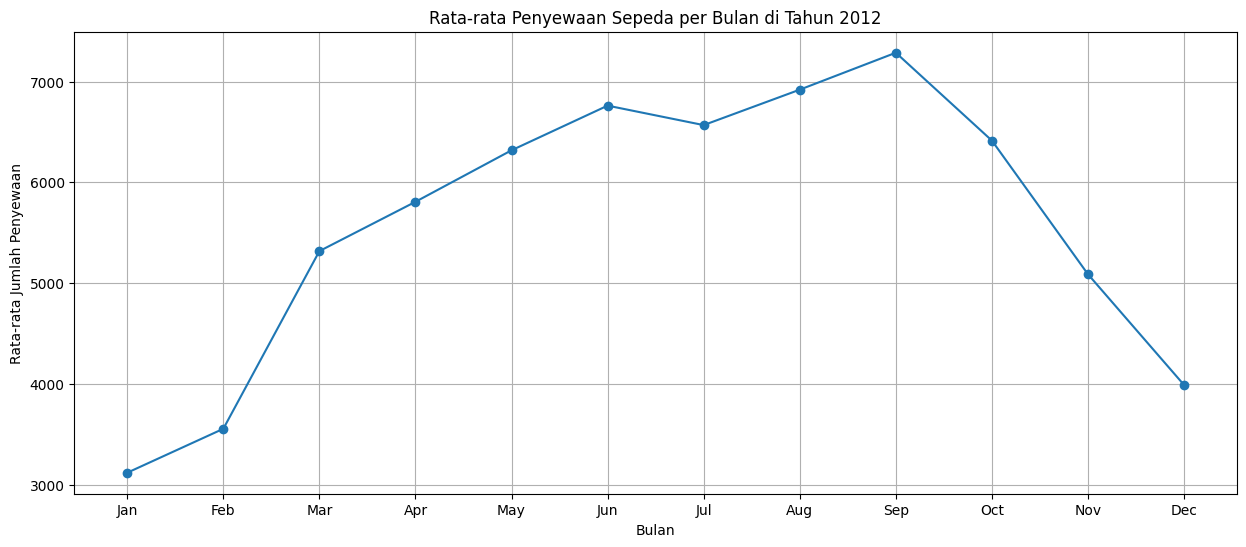

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(month_rentals_2012.index, month_rentals_2012['cnt'], marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Bulan di Tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(month_rentals_2012.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

- Berdasarkan grafik diatas, terjadi kenaikan penyewaan sepeda pada Bulan Februari hingga September.
- Grafik mulai menurun setelah Bulan September hingga Bulan Desember.
- Terjadi puncak rata - rata penyewaan sepeda pada Bulan Agustus dan Bulan September.

### Pertanyaan 2: Pada iklim yang seperti apa rata - rata pelanggan paling banyak dan paling sedikit menyewa sepeda di dua tahun terakhir?

buat variabel berisi dataframe season dan rata rata pelanggan

In [35]:
season_rental = day_df.groupby(by="season").agg({"cnt": ["mean"]})
print("Rata - rata penyewaan sepeda berdasarkan musim:")
display(season_rental)

Rata - rata penyewaan sepeda berdasarkan musim:


,cnt
,mean
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


buat barplot secara horizontal agar legenda tidak memiliki ruang yang sempit

/tmp/ipython-input-3161728806.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rental_sorted['cnt']['mean'], y=season_rental_sorted.index.astype(str), orient='h', palette=colors)


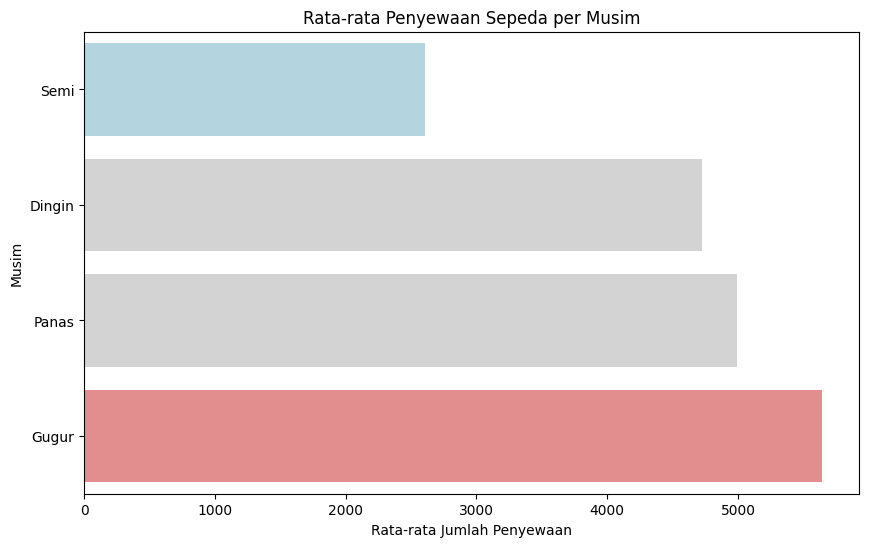

In [42]:
season_rental = day_df.groupby(by="season").agg({"cnt": ["mean"]})
season_rental_sorted = season_rental.sort_values(by=('cnt', 'mean'), ascending=True)

colors = ['lightblue', 'lightgrey', 'lightgrey', 'lightcoral']

plt.figure(figsize=(10, 6))
sns.barplot(x=season_rental_sorted['cnt']['mean'], y=season_rental_sorted.index.astype(str), orient='h', palette=colors)
plt.title('Rata-rata Penyewaan Sepeda per Musim')
plt.xlabel('Rata-rata Jumlah Penyewaan')
plt.ylabel('Musim')
plt.yticks(season_rental_sorted.index.astype(str), ['Semi', 'Dingin', 'Panas', 'Gugur'])
plt.show()

**Insight:**
- Rata - rata penyewaan sepeda terendah berada pada musim semi dengan jumlah  2604.132597
- Rata - rata penyewaan sepeda tertinggi berada pada musim gugur dengan jumlah  5644.303191

### Pada cuaca seperti apa pelanggan rata - rata paling banyak dan paling sedikit meminjam sepeda di dua tahun terakhir?

buat barplot buat barplot secara horizontal agar legenda tidak memiliki ruang yang sempit

/tmp/ipython-input-1652701303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rental_sorted['cnt']['mean'], y=weather_rental_sorted.index.astype(str), orient='h', palette=colors)


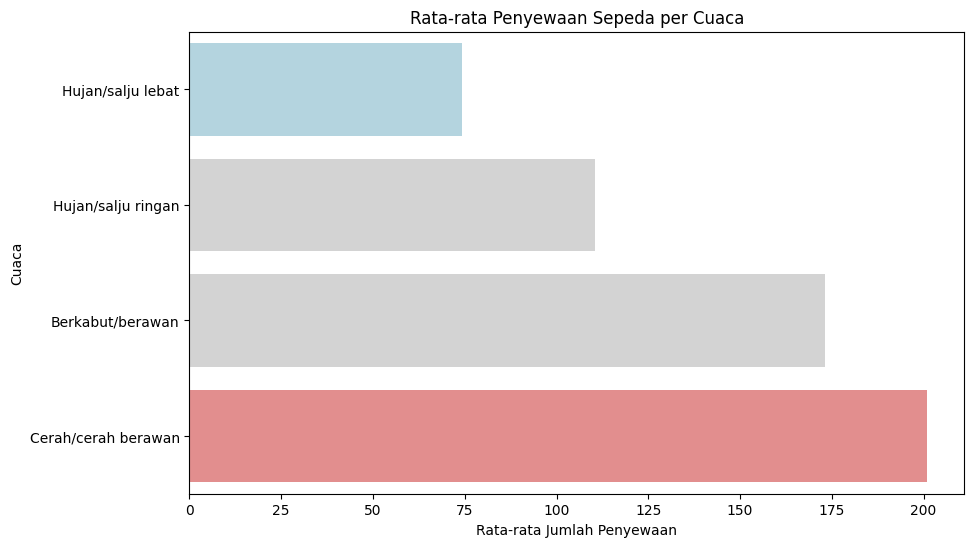

In [43]:
weather_rental = hour_df.groupby(by="weathersit").agg({"cnt":["mean"]})
weather_rental_sorted = weather_rental.sort_values(by=('cnt', 'mean'), ascending=True)

colors = ['lightblue', 'lightgrey', 'lightgrey', 'lightcoral']

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_rental_sorted['cnt']['mean'], y=weather_rental_sorted.index.astype(str), orient='h', palette=colors)
plt.title('Rata-rata Penyewaan Sepeda per Cuaca')
plt.xlabel('Rata-rata Jumlah Penyewaan')
plt.ylabel('Cuaca')
plt.yticks(weather_rental_sorted.index.astype(str), ['Hujan/salju lebat', 'Hujan/salju ringan', 'Berkabut/berawan', 'Cerah/cerah berawan'])
plt.show()

- Rata - rata penyewaan sepeda terendah berada pada cuaca hujan atau salju lebat dengan jumlah 74.333333
- Rata - rata penyewaan sepeda tertinggi berada pada cuaca cerah atau cerah berawan dengan jumlah 201.057172

## Analisis Lanjutan Clustering : Manual Grouping

Pada dataset yang digunakan, terdapat dua demografi pelanggan yaitu pelanggan teregistrasi (registered) dan pelanggan kasual (casual). Namun , pada dataset belum ada jumlah pasti kedua demografi tersebut. Pastinya, sebagai pemilih usaha, perlu mengetahui jumlah demografi tersebut untuk menarik pelanggan kasual menjadi teregistrasi.

Dari eksplorasi data, kita tahu bahwa pelanggan kasual suka menyewa sepeda pada situasi - situasi tertentu seperti hari libur kerja maupun weekend.

Karena dataset tidak menyertai id pelanggan, maka kita hanya bisa menjumlah pelanggan secara gamblang. Mungkin jumlah tersebut terdapat duplikasi karena kemungkinan pelanggan yang kembali meminjam sepeda.

Record index juga tidak menyertakan id secara individual.

In [38]:
total_casual_day = day_df['casual'].sum()
total_registered_day = day_df['registered'].sum()

print(f"Total Casual Users (day_df): {total_casual_day}")
print(f"Total Registered Users (day_df): {total_registered_day}")

total_casual_hour = hour_df['casual'].sum()
total_registered_hour = hour_df['registered'].sum()

print(f"Total Casual Users (hour_df): {total_casual_hour}")
print(f"Total Registered Users (hour_df): {total_registered_hour}")

Total Casual Users (day_df): 602628.0
Total Registered Users (day_df): 2672662
Total Casual Users (hour_df): 541509
Total Registered Users (hour_df): 2583305


- Dari sini, kita tahu bahwa pelanggan teregistrasi lebih banyak dibanding pelanggan kasual
- Karena kedua dataset menunjukan perbandingan yang mirip, kita visualisasikan menggunakan tabel day_df agar lebih simpel

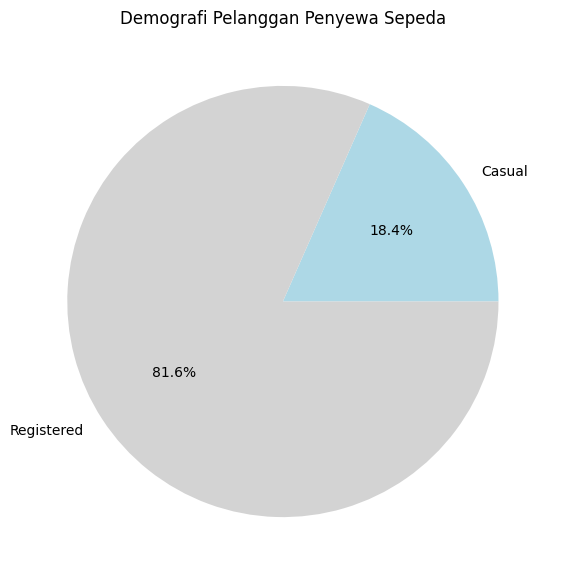

In [39]:
#buat variabel data untuk plot pie chart
data = [total_casual_day, total_registered_day]
demography= ['Casual', 'Registered']
# buat warna
colors = ("lightblue", "lightgrey")
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=demography, colors=colors, autopct='%1.1f%%')
plt.title('Demografi Pelanggan Penyewa Sepeda')
plt.show()

Terdapat 18,4% pelanggan kasual yang bisa disuguhkan program - program dari perusahaan penyewa sepeda yang dapat memudahkan kebutuhan mereka saat meminjam sepeda.

## Kesimpulan

- Secara umum tren rata - rata penyewaan sepeda di tahun 2012 meningkat, namun terjadi penurunan setelah Bulan September hingga Bulan Desember.
- Rata - rata pelanggan paling sedikit menyewa sepeda pada musim semi, sedangkan rata - rata pelanggan paling banyak menyewa sepeda pada musim gugur.
- Rata - rata penyewaan sepeda terendah berada pada cuaca hujan atau salju lebat, sedangkan rata - rata penyewaan sepeda tertinggi berada pada cuaca cerah atau cerah berawan.
- Mayoritas pelanggan penyewa sepeda merupakan pelanggan tetap (registered), sedangkan minoritas pelanggan penyewa sepeda merupakan pelanggan kasual (casual).

Download dataset bersih

In [ ]:
day_clean_df = day_df

In [ ]:
day_clean_df.to_csv("day_clean_df.csv", index=False)

In [ ]:
hour_clean_df = hour_df

In [ ]:
hour_clean_df.to_csv("hour_clean_df.csv", index=False)